ES335 Pre-requisite Test

Eshaan Ashish Jaiswal

24110116

Github.com/EshaanJaiswal

1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

multiplication = n * k * m (because for an element we have k multiplications and we have to have n * m elements in the new matrix)
addition = (k-1) * n * m (because again n*m elements in the new matrix and we have k-1 addition signs there k-1 addition operations for each n * m elements.)

also this was based on the formula of matrix multiplication.

I don't know mathjax or latex currently therefore using ChatGPT for the formatting of the latex.

$$
C_{i,j} = \sum_{l=1}^{k} A_{i,l} \cdot B_{l,j}
$$


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

Ans: This one is a great question. My answer is based on what Andrew NG taught in Machine learning specialization. Multiplying two matrices using a loop (list of lists) will have a time complexity of O(n * k * m) (I am not sure if I am really correct but this is what I think is the time complexity because the loop will iterate through all the multiplications therefore that is my assumption and anyways its the worst possible case [big O notation moment] )

That was the case for the loop thingy / list of lists , but what numpy uses is the hardware on our system. A Random fun fact out of nowhere which I would like to tell is that GPUs are efficient in matrix operations and this is because of how they work. Therefore when you add two matrices it does the job in O(1) Time (Time complexity might not be correct but you get the point while completing this paragraph). its basically adding the whole matrix in a single step rather than going from element to element again and again by using the advanced hardware we currently have.

I don't know what might be the case for CPU based addition or multiplication of matrices but this thing alwayse works for GPU and with this analogy it seems pretty obvious that same might the case with CPU.

Therefore, Numpy is more efficient in terms of timing.

(seems like, the concept i was trying to explain is vectorization, adding just in case...)

In [2]:
#Used ChatGPT for Code because its again labour work to write it from scratch and also internet is allowed.

# Pure Python matrix multiplication using list of lists

def matrix_multiply_list(A, B):
    # Get dimensions
    n = len(A)
    k = len(A[0])
    k2 = len(B)
    m = len(B[0])
    
    # Check dimension compatibility
    if k != k2:
        raise ValueError("Incompatible dimensions for matrix multiplication.")
    
    # Initialize result matrix C with zeros
    C = [[0 for _ in range(m)] for _ in range(n)]

    # Perform multiplication
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    
    return C

# Example usage
A = [
    [1, 2, 3],
    [4, 5, 6]
]  # Shape (2, 3)

B = [
    [7, 8],
    [9, 10],
    [11, 12]
]  # Shape (3, 2)

C = matrix_multiply_list(A, B)

print("Result using list of lists:")
for row in C:
    print(row)


Result using list of lists:
[58, 64]
[139, 154]


In [3]:
# NumPy matrix multiplication

import numpy as np

# Define matrices using numpy arrays
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])  # Shape (2, 3)

B = np.array([
    [7, 8],
    [9, 10],
    [11, 12]
])  # Shape (3, 2)

# Perform matrix multiplication
C = np.dot(A, B)

print("Result using NumPy:")
print(C)


Result using NumPy:
[[ 58  64]
 [139 154]]


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

first method will take around O(n) time and a better method to use is sorting using an efficient algorithm and then finding the median because we have to either find mean of 2 mid elements or just the mid element there for O(nlogn). Numpy uses the same approach there O(nlogn)

I can implement both (i am doubtful about the first one) but again avoiding the labour work.

4. What is the gradient of the following function with respect to x and y?
$$
x^2 y + y^3 \sin(x)
$$


### Partial Derivative with respect to \( x \)
$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

### Partial Derivative with respect to \( y \)
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$


5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [2]:
%pip install jax

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import jax.numpy as jnp
import jax
import numpy as np

def f(xy):
    x, y = xy
    return x**2 * y + y**3 * jnp.sin(x)

gradient_f = jax.grad(f)

def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * np.cos(x)
    df_dy = x**2 + 3 * y**2 * np.sin(x)
    return np.array([df_dx, df_dy])

np.random.seed(0)
for _ in range(5):
    x, y = np.random.uniform(-2, 2, 2)
    jax_grad = np.array(gradient_f((x, y)))
    analytic_grad = analytical_grad(x, y)
    print(f"x = {x:.3f}, y = {y:.3f}")
    print("  JAX grad:       ", jax_grad)
    print("  Analytical grad:", analytic_grad)
    print("  Difference:     ", np.abs(jax_grad - analytic_grad), "\n")

x = 0.195, y = 0.861
  JAX grad:        [0.96175283 0.46936488]
  Analytical grad: [0.96175281 0.46936488]
  Difference:      [1.69705558e-08 5.27925481e-11] 

x = 0.411, y = 0.180
  JAX grad:        [0.15289979 0.20760232]
  Analytical grad: [0.15289979 0.20760232]
  Difference:      [1.16703675e-10 3.54198598e-09] 

x = -0.305, y = 0.584
  JAX grad:        [-0.16687778 -0.2139185 ]
  Analytical grad: [-0.1668778  -0.21391851]
  Difference:      [2.27058016e-08 4.65709249e-10] 

x = -0.250, y = 1.567
  JAX grad:        [ 2.9466708 -1.7578913]
  Analytical grad: [ 2.94666996 -1.75789115]
  Difference:      [8.11659155e-07 1.52280255e-07] 

x = 1.855, y = -0.466
  JAX grad:        [-1.7010194  4.065757 ]
  Analytical grad: [-1.70101937  4.06575675]
  Difference:      [4.10603889e-08 4.87286229e-08] 



6. Use sympy to confirm that you obtain the same gradient analytically.

In [4]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sympy in c:\users\eshaa\appdata\local\programs\python\python313\lib\site-packages (1.13.1)




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import sympy as sp

# Define the symbolic variables
x, y = sp.symbols('x y')

# Define the function
f = x**2 * y + y**3 * sp.sin(x)

# Compute partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the results
print("∂f/∂x =", df_dx)
print("∂f/∂y =", df_dy)


∂f/∂x = 2*x*y + y**3*cos(x)
∂f/∂y = x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [7]:
students_data = {
    2022: {
        "Computer Science": {
            101: {
                "Name": "Aarav",
                "Marks": {
                    "Maths": 95,
                    "English": 88,
                    "Data Structures": 90
                }
            }
        },
        "Mechanical": {
            201: {
                "Name": "Bhavna",
                "Marks": {
                    "Maths": 85,
                    "Thermodynamics": 92,
                    "English": 80
                }
            }
        }
    },
    2023: {
        "Electrical": {
            301: {
                "Name": "Chirag",
                "Marks": {
                    "Maths": 89,
                    "Circuits": 91,
                    "English": 86
                }
            }
        },
        "Computer Science": {
            102: {
                "Name": "Deepa",
                "Marks": {
                    "Maths": 98,
                    "English": 90,
                    "Algorithms": 94
                }
            }
        }
    },
    2024: {
        "Mechanical": {},
        "Computer Science": {},
        "Electrical": {}
    },
    2025: {
        "Mechanical": {},
        "Computer Science": {},
        "Electrical": {}
    }
}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [8]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks  # Dictionary: {subject: marks}

    def __repr__(self):
        return f"{self.roll_number}: {self.name}, Marks: {self.marks}"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch: {self.name}, Students: {len(self.students)}"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch):
        self.branches[branch.name] = branch

    def get_branch(self, name):
        return self.branches.get(name)

    def __repr__(self):
        return f"Year: {self.year}, Branches: {list(self.branches.keys())}"


class StudentDatabase:
    def __init__(self):
        self.years = {}

    def add_year(self, year):
        self.years[year.year] = year

    def get_year(self, year_number):
        return self.years.get(year_number)

    def __repr__(self):
        return f"Database Years: {list(self.years.keys())}"


In [9]:
# Create database
db = StudentDatabase()

# Add years
for y in [2022, 2023, 2024, 2025]:
    db.add_year(Year(y))

# Add branches to 2022
cs_branch = Branch("Computer Science")
me_branch = Branch("Mechanical")

db.get_year(2022).add_branch(cs_branch)
db.get_year(2022).add_branch(me_branch)

# Add students to CS 2022
cs_branch.add_student(Student("Aarav", 101, {"Maths": 95, "English": 88, "Data Structures": 90}))
cs_branch.add_student(Student("Deepa", 102, {"Maths": 98, "English": 90, "Algorithms": 94}))

# Add student to Mechanical 2022
me_branch.add_student(Student("Bhavna", 201, {"Maths": 85, "Thermodynamics": 92, "English": 80}))


In [10]:
# Get all students in Computer Science, 2022
students = db.get_year(2022).get_branch("Computer Science").students
for student in students:
    print(student)


101: Aarav, Marks: {'Maths': 95, 'English': 88, 'Data Structures': 90}
102: Deepa, Marks: {'Maths': 98, 'English': 90, 'Algorithms': 94}


We are using self (for calling object itself) and repr is something hard to explain but its for string operation and to print something meaninful rather than something ambiguous. 

again this some classic oops programming structure and all...

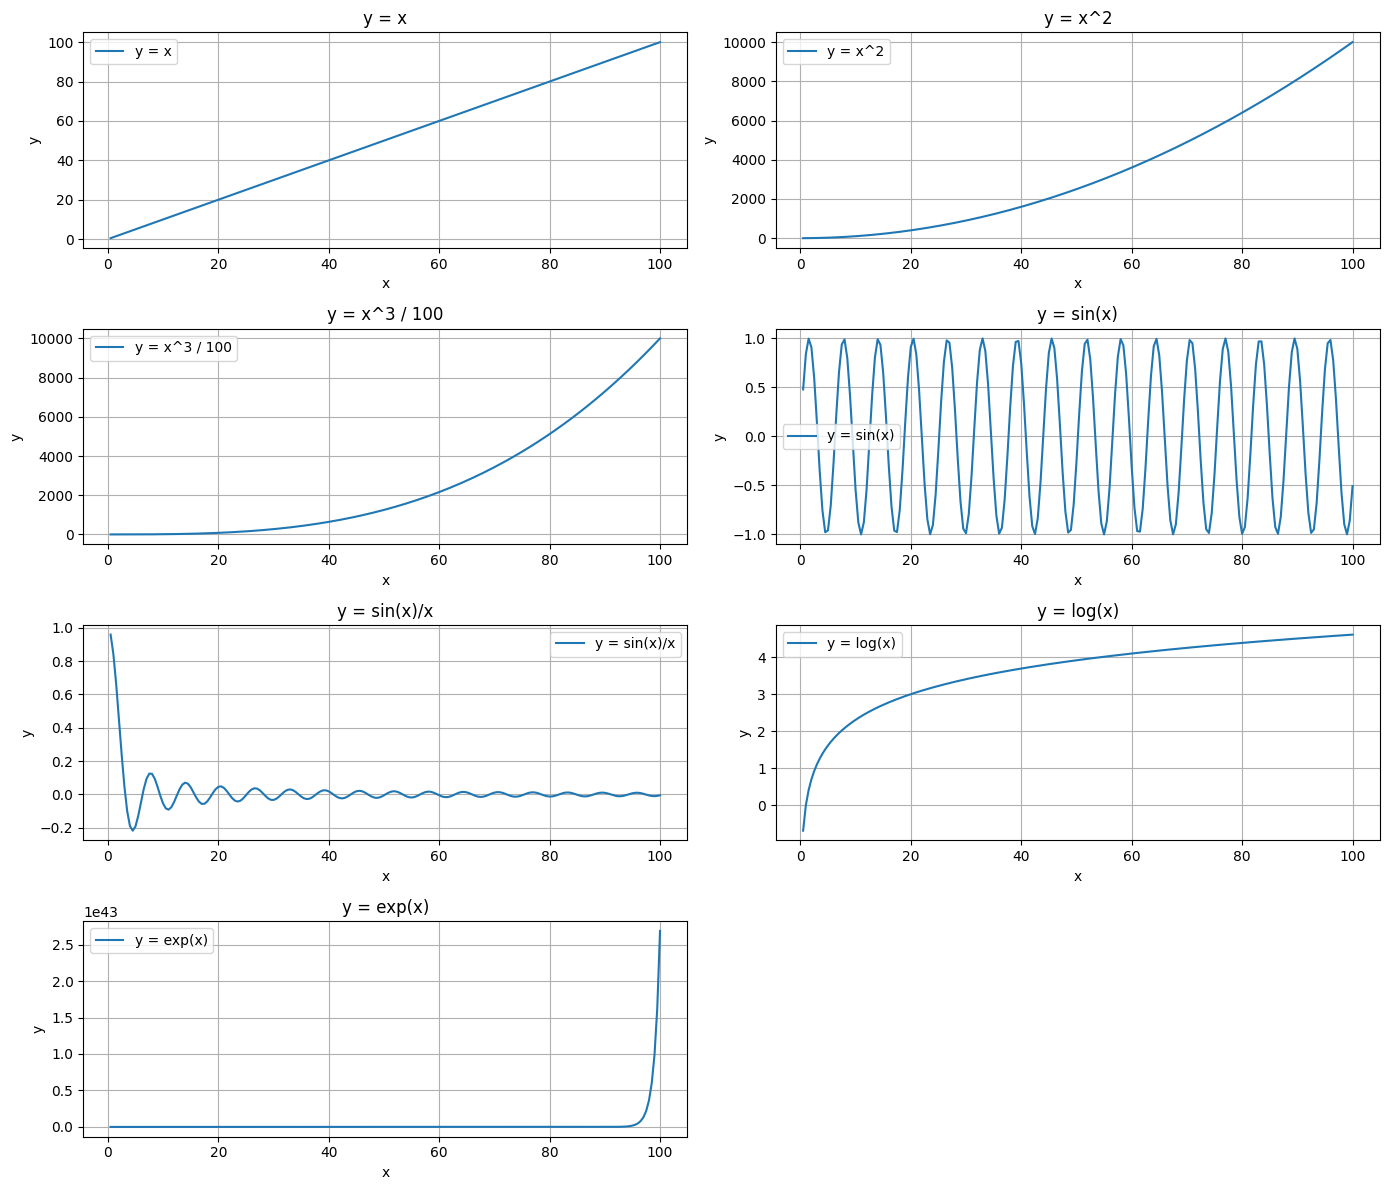

In [ ]:
#answer for question 9

import numpy as np
import matplotlib.pyplot as plt

# Define domain
x = np.arange(0.5, 100.5, 0.5) #iske jagah I guess linspace bhi use kar sakte the but this is fine
# x = np.linspace(0.5, 100, 200) # Alternative way to define the domain

# Define functions
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create subplots
plt.figure(figsize=(14, 12))

functions = [
    (y1, "y = x"),
    (y2, "y = x^2"),
    (y3, "y = x^3 / 100"),
    (y4, "y = sin(x)"),
    (y5, "y = sin(x)/x"),
    (y6, "y = log(x)"),
    (y7, "y = exp(x)")
]

for i, (y, label) in enumerate(functions, start=1):
    plt.subplot(4, 2, i)
    plt.plot(x, y, label=label)
    plt.title(label)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [12]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, (20, 5))  # Generate a 20x5 matrix with random numbers from 1 to 2
df = pd.DataFrame(mat, columns=["a", "b", "c", "d", "e"])  # Create DataFrame with specified column names
col_with_highest_std = df.std().idxmax()  # Find column with highest standard deviation
row_with_lowest_mean = df.mean(axis=1).idxmin()  # Find row with lowest mean
print("Column with highest standard deviation:", col_with_highest_std)
print("Row with lowest mean index:", row_with_lowest_mean)

Column with highest standard deviation: c
Row with lowest mean index: 13


11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [18]:

df["f"] = df[["a", "b", "c", "d", "e"]].sum(axis=1)  # Create new column 'f' as sum of a, b, c, d, e
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")  # Create new column 'g' based on condition
lt8_count = (df["g"] == "LT8").sum()  # Count rows where g is "LT8"
gt8_count = (df["g"] == "GT8").sum()  # Count rows where g is "GT8"
print("Number of rows where g is 'LT8':", lt8_count)
print("Number of rows where g is 'GT8':", gt8_count)
lt8_std = df[df["g"] == "LT8"]["f"].std()
gt8_std = df[df["g"] == "GT8"]["f"].std()  # Standard deviation for 'GT8'
print("Standard deviation of 'f' for LT8:", lt8_std)
print("Standard deviation of 'f' for GT8:", gt8_std)

Number of rows where g is 'LT8': 17
Number of rows where g is 'GT8': 3
Standard deviation of 'f' for LT8: 0.577418513677576
Standard deviation of 'f' for GT8: 0.31417730956696044


12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting is basically giving us the ability to add or do operations with arrays or matrices of different shapes and sizes in numpy. We can easily add a scalar to an array by broadcasting. lemme give an idea with an example like I have a matrix [[1,2,3],[4,5,6],[7,8,9]] and another matrix [1,2,3] and we add them using broadcasting in python therefore its result will be [[1,2,3],[4,5,6,],[7,8,9]] + [[1,2,3],[1,2,3],[1,2,3]]

basically it converts the array [1,2,3] to [[1,2,3],[1,2,3],[1,2,3]] for addition purpose and its actually computationally easy to do this.

$$
[1, 2, 3] \rightarrow \begin{bmatrix}
1 & 2 & 3 \\
1 & 2 & 3 \\
1 & 2 & 3 \\
\end{bmatrix}
$$


In [20]:
#a good example of broadcasting
import numpy as np

mat = np.matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat_2 = np.matrix([[1,2,3]])
print(mat + mat_2)  # Broadcasting example, mat_2 is added to each row of mat

[[ 2  4  6]
 [ 5  7  9]
 [ 8 10 12]]


13.Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
#create an hypothetical numpy array
import numpy as np
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#https://stackoverflow.com/questions/70631490/how-can-i-make-np-argmin-code-without-numpy
#I tried using this also but it didn't work........ 
#whoever is gonna grade this pre requisite test, please tell me where I went wrong in this code 
def compute_argmin(arr):
    # Custom function to compute argmin
    min_index = 0
    min_value = arr[0] # Initialize with the first element
    for i in range(len(arr)):   
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index
def compute_argmin_numpy(arr):
    return np.argmin(arr)

print("Index of minimum element using custom function:", compute_argmin(arr))
print("Index of minimum element using numpy function:", compute_argmin_numpy(arr))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()